# Main Notebook for Analysis on ADHD Diagnostics for Women 

### Outline 
0. Loading necessary packages and other set up tasks 
1. Loading in Data 
2. Initial 
3. Further EDA 
4. Preprocessing 
5. Perform Machine Learning 

Much of this notebook taken from https://colab.research.google.com/drive/1Np9n8r-amPxTT-P1fm0xwH8tp4OiD8lE#scrollTo=ZL9Fy4Be2izZ , with some modification to files paths and other small changes. 

## 0. Loading packages and all that

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

## 1. Loading in Data 

### Loading in Data Frames 

First, categorical data 

In [15]:
# categorical variable train dataframe

file_path_trainC = "data/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx"
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [16]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

Next, the functional connectome matrices 

In [17]:
# Functional Connectome Matrices

file_path_trainFCM = "data/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [18]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

Next, we load the quantitative data 

In [19]:
file_path_trainQ = "data/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [20]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

Finally, the ADHD marking solution data

In [22]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = "data/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [23]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

## 2. Exploratory Data Analysis (EDA) 

EDA is done to better understand our datasets by looking at the patterns, trends, and relationships in it. It can also help us understand if we have any outliers or missing data. Further, we can get a sense of how our variables interact. 

We start by getting some basic summaries of our data using .info() and .describe()

For many of our columns, we will want to use the dictionary provided by Kaggle. Note that for our first data set, for example, different integers correspond to different categorical answers. 

In [ ]:
# Initial read of categorical training data info
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


One thing we can do is look into the data using .value_counts() to see more about how the distribution works in some of these categories. We do this below for parental education level and occupation status, which is used as a simplified measure of social status.


In [28]:
# Looking further into the occupation for parent 1
train_cat['Barratt_Barratt_P1_Occ'].value_counts()


Barratt_Barratt_P1_Occ
0     317
35    219
45    187
40    154
30    154
25     79
15     35
20     31
5      31
10      6
Name: count, dtype: int64

In [33]:
# And parent 2
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
15     86
20     41
5      38
10     37
25     25
Name: count, dtype: int64

In [ ]:
# Now the education level for parent 1
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
0      15
6      15
3       5
Name: count, dtype: int64

In [31]:
# And the education level for parent 2
train_cat['Barratt_Barratt_P2_Edu'].value_counts()

Barratt_Barratt_P2_Edu
21    323
18    301
0     198
15    166
12    162
9      44
6      14
3       5
Name: count, dtype: int64

This is great, but we might want to be able to "see" the data better. we can use packages like Seaborn to actually visualize the distributions here.

Now is also a good time to copy in info from the dicitionary so that we can beter understand what these codes mean. 

#### Parental Occupations: 

0=Homemaker, stay at home parent.

5=Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.

10=Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.

15=Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.

20=Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.

25=Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.

30=Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.

35=Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.

40=Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.

45=Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant.

#### Parental Education Levels

3=Less than 7th grade

6=Junior high/Middle school (9th grade)

9=Partial high school (10th or 11th grade)

12=High school graduate

15=Partial college (at least one year)

18=College education

21=Graduate degree


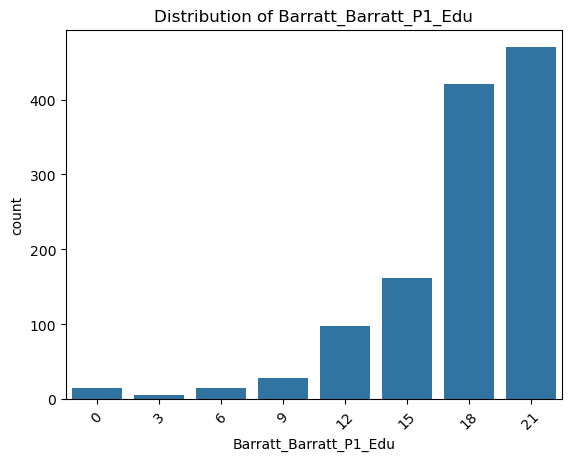

In [ ]:
# Graphing educational data for parent 1

sns.countplot(x='Barratt_Barratt_P1_Edu', data=train_cat[['Barratt_Barratt_P1_Edu']])
plt.title(f"Distribution of Barratt_Barratt_P1_Edu")
plt.xticks(rotation=45)
plt.show()

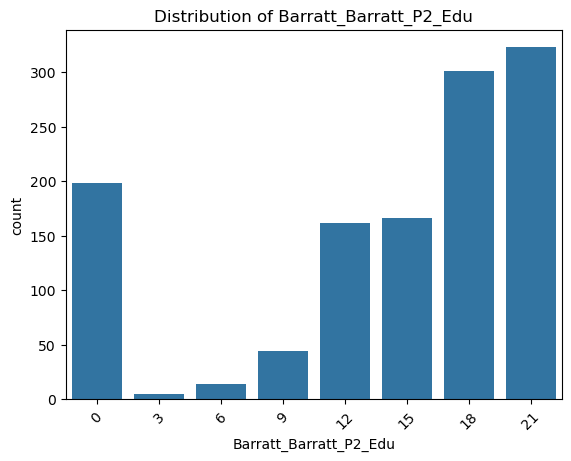

In [35]:
# and parent 2
sns.countplot(x='Barratt_Barratt_P2_Edu', data=train_cat[['Barratt_Barratt_P2_Edu']])
plt.title(f"Distribution of Barratt_Barratt_P2_Edu")
plt.xticks(rotation=45)
plt.show()

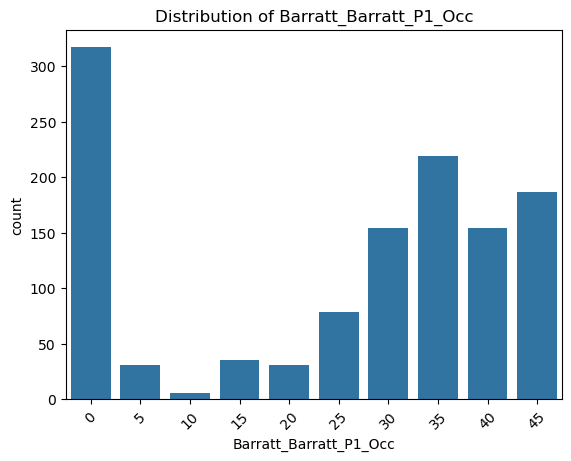

In [36]:
# Now for occupation of parent 1
sns.countplot(x='Barratt_Barratt_P1_Occ', data=train_cat[['Barratt_Barratt_P1_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P1_Occ")
plt.xticks(rotation=45)
plt.show()


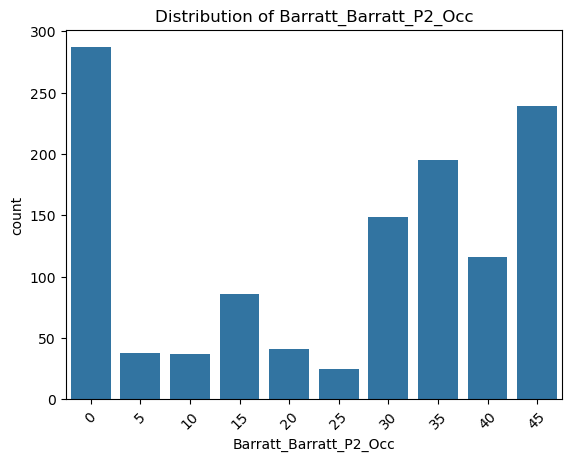

In [37]:
# and 2
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

Another interesting thing to check might be the age of the participant when they got their MRI scans. 

Notice that we don't actually have to look at counts, we can create a histogram outright. 

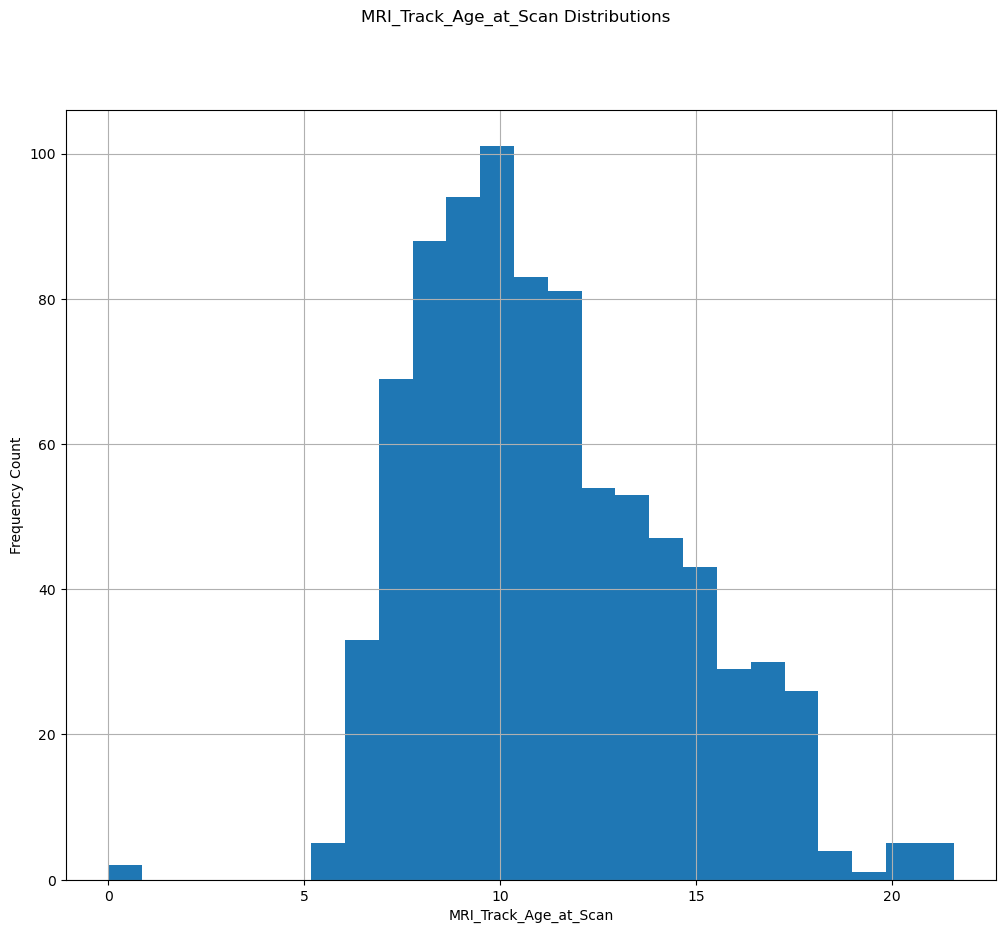

In [40]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=25)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


Here, we have a potentially interesting or errorenous finding- why are there some (2) scans on 1 year olds? Ultimately, this is a small number relative to the data set, but spikes in unnexpected areas are one of the things you can spot with EDA.

Next, we can look at the distribution of our labels for ADHD and Gender. This will be found in the train_Solutions file. Recall that for our ADHD marker, 0 = no and 1 = yes, while for gender/sex, 0 = male and 1 = female. 

In [41]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

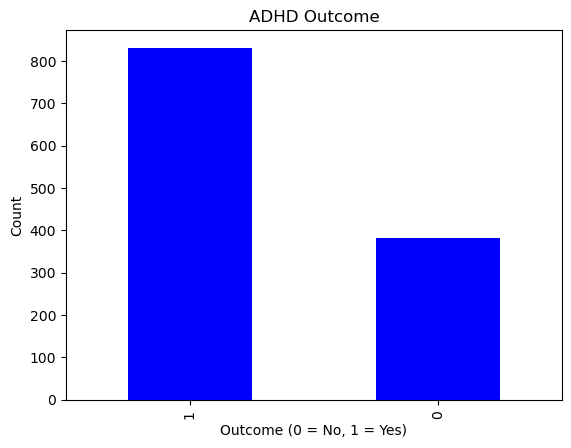

In [42]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [43]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

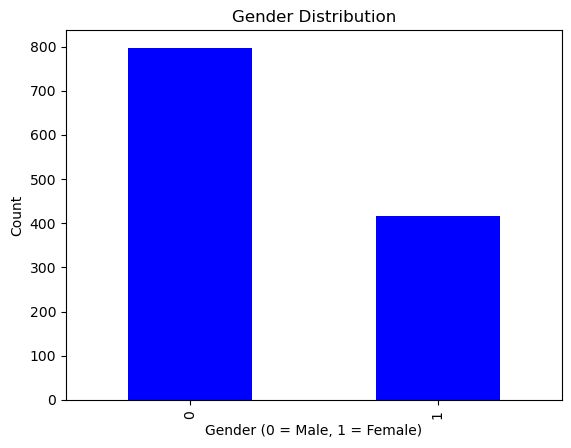

In [44]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

**Key Insight**: Our training data has a gender imbalance that might introduce bias in our modeling. We need to take care to sort this our during our actual data preparation. 

We also note that there is an imbalance in ADHD outcomes as well.

**Seeking other Biases**: The gender imbalance may feel particularly important with gender being a focus of this study, but we should not ignore that other biases may exist in this data. Let's take a peak at the racial breakdown of our data, noting the following numerical representations of our categories. 

0= White/Caucasian

1= Black/African American

2= Hispanic

3= Asian

4= Indian

5= Native American Indian

6= American Indian/Alaskan Native

7= Native Hawaiian/Other Pacific Islander

8= Two or more races

9= Other race

10= Unknown

11=Choose not to specify

Further, parental education and occupation disparities exist in our data. Noting that the occupational code "0" corresponds to homemaker and the educational code "21" corresponds to a graduate degree, we can ask about what kind of families are able to participate in this kind of study in the first place. 

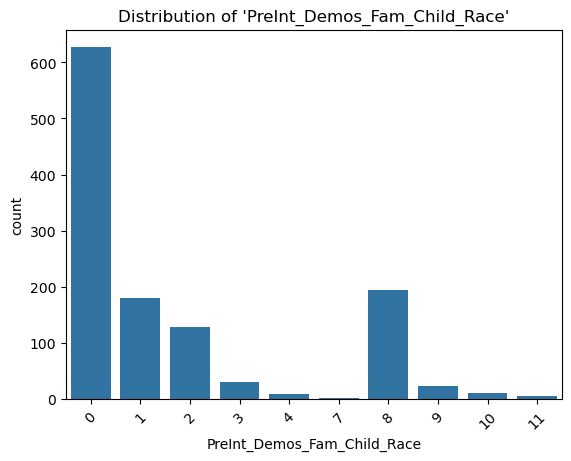

In [45]:
sns.countplot(x='PreInt_Demos_Fam_Child_Race', data=train_cat[['PreInt_Demos_Fam_Child_Race']])
plt.title(f"Distribution of 'PreInt_Demos_Fam_Child_Race'")
plt.xticks(rotation=45)
plt.show()

Assuming this data is out of the greater NYC area, the racial make up is not that unusual. However, the model is trained on more white people than any other racial groups, by a lot. 

## 3. Further EDA

or "How to test predictiveness"

#### We now seek to understand some quantitative data

In [46]:
# Noting what some of the non-MRI quantitative data even is... 
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

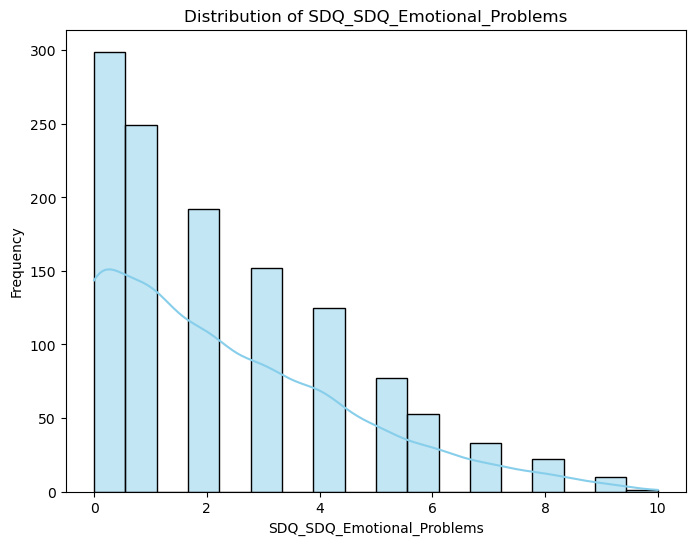

In [47]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

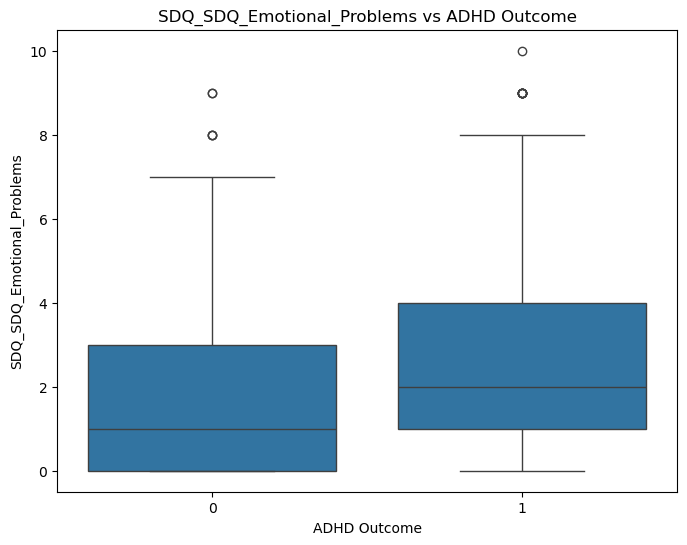

In [48]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


From this box-plot pair, we can see that people diagnosed with ADHD have a tendancy toward a higher median on the SDQ Emotional Problems scale. We also see greater variability in this plot. 

## 4. Preprocessing 

#### Transforming some categorical data

This will allow us to compare ADHD rates to parental education levels and other categorical data. 

In [49]:
# Taking another look at the column titles for our categorical data 

train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

And here's a reminder of what the numbers within the education columns mean: 

- 3=Less than 7th grade
- 6=Junior high/Middle school (9th grade)
- 9=Partial high school (10th or 11th grade)
- 12=High school graduate
- 15=Partial college (at least one year)
- 18=College education
- 21=Graduate degree

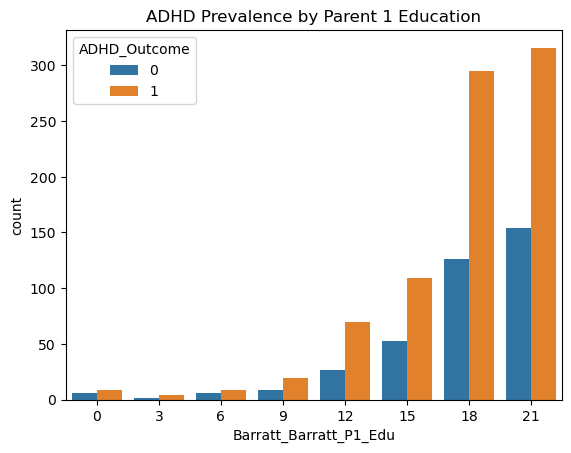

In [51]:
# Graph for parent 1's education 

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

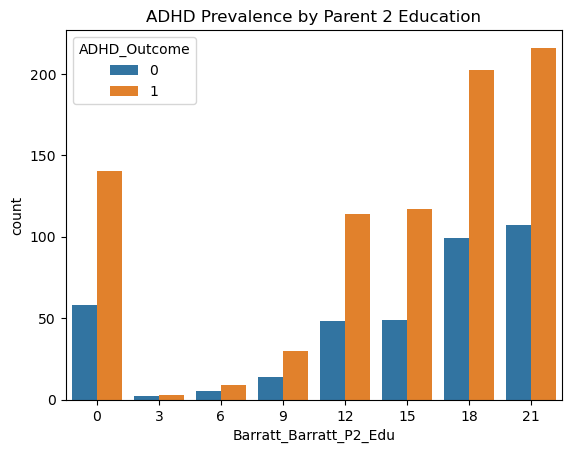

In [52]:
# Graph for parent 2

sns.countplot(data=train_cat, x='Barratt_Barratt_P2_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 2 Education')
plt.show()

We note that the number of ADHD cases, the categories with more instances of ADHD diagnosis also have a higher number of people in them. It is possibly that the number of cases is just a refelction of there being more people in these groups. 

However, we should address this by normalizing the data. This process starts with computing percentages and looking for major discrepancies. 

To do this, we need to add a column from our solutions data to (a new copy of) the categorical data. 

In [53]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

# grouping ADHD cases by parent 1 ed levels and finding mean 
adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
0     0.600000
3     0.800000
6     0.600000
9     0.678571
12    0.721649
15    0.672840
18    0.700713
21    0.672340
Name: ADHD_Outcome, dtype: float64


We see that categories 3 (less than 7th grade) and 12 (high school graduate) show the highest proportions of ADHD outcomes. 

Next we can also take a look at these numbers for parent 2. 

In [54]:
# Same analysis for parent 2, but there's no need to make a new copy this time. 

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P2_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P2_Edu
0     0.707071
3     0.600000
6     0.642857
9     0.681818
12    0.703704
15    0.704819
18    0.671096
21    0.668731
Name: ADHD_Outcome, dtype: float64


It's interesting (to me at least) that there is less variation on this set and that the lowest percent here corresponds to the highest percent in p1

#### Further pre-processing with "One-Hot" Encoding

What is one - hot encoding? 

One hot encoding creates a new binary column for each unique category within a variable. For example, in the Parent 1 Occupation column with 10 possible categories (e.g., 0, 5, 10, 15, 20, etc.), one-hot encoding will generate 10 new columns: Parent_1_Occupation_0, Parent_1_Occupation_5, Parent_1_Occupation_10, and so on.

Each of these new columns will contain boolean values (True or False). For instance, if a participant's parent 1 occupation falls into category 0, the Parent_1_Occupation_0 column will have a value of True, while the other columns for this variable will be False. The same logic applies to the other categories, ensuring each participant is appropriately represented in the dataset.

Why use this? 

1. Avoid implying ordinal relationships - Using numbers directly might suggest some kind of meaningful order or scale where there is none, which could lead to incorrect assumptions. We can eliminate this by turning each possible value into its own binary column. 
2. Improve algorithm performance - binary categories that result from one-hot coding often give better performance with logistical regression, decision trees, and neural networks. 

There's some work we will need to do for this process, though. One-hot encoding only works on categorical variables so first we need to switch our integer-based representation to the categorical one. 

In [55]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

Since the first column in our data is participant ID, we need to skip that with our encoding. Later, when we merge data frames, we will use this column to do that. 

To ensure this is done correctly, we will need to make a list of columns to encode that skips this first one. 

In [56]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


Notice that we did skip the participant ID column! 

In [59]:
# encoding categorical data, had to change .applymap to .map for more up to date file
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

Now we introduce that first column back in, and take a ook at the first few rows to ensure we did this correctluy. 

In [60]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
cat_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 2   Basic_Demos_Enroll_Year_2016      1213 non-null   int64  
 3   Basic_Demos_Enroll_Year_2017      1213 non-null   int64  
 4   Basic_Demos_Enroll_Year_2018      1213 non-null   int64  
 5   Basic_Demos_Enroll_Year_2019      1213 non-null   int64  
 6   Basic_Demos_Enroll_Year_2020      1213 non-null   int64  
 7   Basic_Demos_Study_Site_2          1213 non-null   int64  
 8   Basic_Demos_Study_Site_3          1213 non-null   int64  
 9   Basic_Demos_Study_Site_4          1213 non-null   int64  
 10  PreInt_Demos_Fam_Child_Race_1     1213 non-null   int64  
 11  PreInt_Demos_Fam_Child_Race_2     1213 non-null   int64  
 12  PreInt

At this point, we want to remind ourselves that we have been working with the training data. When we are working through test data, we must apply the exact pre-processing and processing steps. 

Thus, we will take a minute to do this before moving on. 

In [66]:
# load in test categorical dataframe

file_path_testC = "data/TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)
#test_cat.head()
# commented out because no peaking! get in good habits 


In [68]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Merging Dataframes 

Starting with training dataframes, where we essentially created the X_train dataframe and the Y_train one will contain the target variables. 

In [70]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

# ensure it looks accurate
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679


Now we create our X_test dataframe, noting that the test data we are using will not have the solutions in it - that's what we're trying to predict! 

In [71]:
file_path_testFCM = "data/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)
#print(train_FCM.head())

file_path_testQ = "data/TEST/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)
#print(train_Quant.head())

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


The final step before ML will be imputing the NA values. LIke before, we will do this for the training data and then follow the exact same procedure for the testing data. 

These notes taken from the datathon notebook directly - 

#### NA values

Before performing machine learning we must adress missing values to ensure optimal model performance.

We will demonstrate how to fill the missing (`NA`) values using the mean of each column as an example.

Note: There are many approaches to handle missing values, and the best method often depends on your dataset and chosen machine learning model. You can explore how your model deals with missing data and try alternative techniques. For example, this [website](https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/) has various ways to handle missing data.

Filling NA values is a key challenge in this datathon to get accurate model performance. Experiment with different methods and evaluate which approach gives the best results for your model!




In [72]:
# check how many NA values we have
print(train_df.isna().sum())

# 371 NANs values
# 360 in MRI_Track_age_at_Scan
# 11 in PreInt_Demos_Fam_Child_Ethnicity

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity     11
Basic_Demos_Enroll_Year_2016          0
Basic_Demos_Enroll_Year_2017          0
Basic_Demos_Enroll_Year_2018          0
                                   ... 
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Length: 19973, dtype: int64


Next, we fill the missing (NA) values in the columns MRI_Track_Age_at_Scan and PreInt_Demos_Fam_Child_Ethnicity individually by replacing them with the mean of their respective columns.

In [ ]:
# Filling NA with means from each col for training data 

train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum()) # should now be zero

0


In [74]:
# Filling NA with means from each col for test data 

# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

## 5. Perform Machine Learning 

Since we are seeking to solve two classification problems here, we need to use a multi-outcome model. 

#### Multi-Outcome Model

A machine learning model is a mathematical model that, after being trained on a dataset, can make predictions or classifications on new data by identifying patterns within the information.

Since this challenge is trying to answer the question:

What brain activity patterns are associated with ADHD; are they different between males and females, and, if so, how?

Our predictions or target variables in this model are gender (1 = female, 0 = male) and ADHD diagnosis (1 = has ADHD, 0 = does not). Both are classification problems, meaning the outputs are binary: each prediction will either be 0 or 1, representing a boolean result.

To predict both target variables simultaneously, we will use a multi-outcome machine learning model. This type of model is designed to predict multiple dependent variables (or outcomes) at the same time, rather than one at a time. For this task, our Y_train dataset will include two target columns—gender and ADHD diagnosis. 


#### X Train and Y Train

For any machine learning model, you need an X_train dataset, which contains the feature variables used to make predictions about the target variables—in this case, ADHD diagnosis and gender. Our feature variables include categorical columns, quantitative variables, and functional connectome matrices. We have prepared our X_train dataframe by encoding categorical variables, merging dataframes, and handling missing values by filling in NAs.

In addition to X_train, we also need Y_train, the dataset containing the target variables, to train the model. The target variables allow the model to learn the patterns in the feature variables that lead to specific outcomes for ADHD diagnosis and gender. This relationship is what enables the model to make accurate predictions when applied to new data.

So the first step we will take in coding is loading in the training solutions dataframe this will be our Y_train.


Note that we could have done this as part of preprocessing, but we are doing it here as it fits fine in this context, too. 

In [75]:
# Creating Y_train
file_path_trainS = "data/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)

Both of these (X_train, Y_train) contain the participant_id column. This type of data cannot be used in machine learning, as those models require int or float data types. It also adds nothing to our analysis. Therefore, we will remove the participant_id column from both dataframes nefore training any machine learning models. 

In [76]:
X_train = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id'])

#### XGBoost, our first model type

" XGBoost

XGBoost, short for eXtreme Gradient Boosting, is an optimized implementation of gradient boosting, a machine learning technique that builds an ensemble of decision trees to make predictions. It is widely used for structured (tabular) data and is especially popular in competitive data science (e.g., Kaggle competitions) due to its high performance, speed, and flexibility.

XGBoost builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous ones. The final prediction is the weighted sum of the predictions from all trees.

Gradient Boosting:

Each tree tries to minimize the error (residual) from the previous step by fitting to the gradient of the loss function.
This iterative process improves the model's accuracy over time.
Ensemble Learning:

By combining multiple weak learners (shallow decision trees), XGBoost creates a strong predictive model.  "

and 

" First we must create an instance of the XGBClassifier from the xgboost library.

Key Parameters Explained:


*   objective='binary:logistic': Specifies the task type as binary classification, with logistic regression as the objective function.
*   n_estimators=100: Sets the number of boosting rounds (i.e., the number of trees to train in the ensemble).
* learning_rate=0.1: Determines the step size shrinkage used to prevent overfitting. Lower values result in slower learning but can improve accuracy.
* max_depth=5: Limits the depth of each decision tree to prevent overfitting while ensuring the model captures enough complexity. "

In [78]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [79]:
# use a utility from sklearn, enable multi-target classification
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [ ]:
# Train the model
#It takes 6min and 45.8s to run!!
#But actually only 3m 54.1s for me!!
multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

Now we test it 

In [81]:
participant_id = test_df['participant_id']

X_test = test_df.drop(columns = 'participant_id')

y_pred = multioutput_classifier.predict(X_test)

In [82]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 0               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 0               0
300   IUEHiLmQAqCi                 1               1
301   cRySmCadYFRO                 0               0
302   E3MvDUtJadc5                 0               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


#### Evaluating Machine Learning Model - Cross Validation Score

The cross-validation score is a metric used to evaluate the performance of a machine learning model by testing it on multiple subsets of the data. It provides an estimate of how well the model is likely to generalize to unseen data.

How Cross-Validation Works:


*   The dataset is divided into 𝑘 equally-sized subsets or folds.
*   The model is trained on k - 1 folds (the training set) and evaluated on the remaining fold (the validation set)
* This process is repeated k times, with each fold being used once as the validation set
* The evaluation metric, we will use accuracy is computed for each iteration

Why are we using cross-validation score:


*  Since we don’t have the true labels for the test data, we cannot calculate the actual accuracy score. Cross-validation provides a reliable way to evaluate our model's performance using the training data without needing the test set answers.
*  Cross-validation ensures that a model is evaluated on multiple subsets of the data

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

Define a custom accuracy metric for multi-output classification, where each target variable (column) needs a separate accuracy calculation.

This function will:


*   Converts y_true and y_pred into NumPy arrays to enable indexing like `[:, i].`
*   Iterates over each column (i.e., target variable) in y_true and y_pred.
* Computes the accuracy score for each target variable using accuracy_score.
* Returns the average accuracy across all target variables.

In [84]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

In [85]:
multi_output_scorer = make_scorer(multi_output_accuracy)

In [86]:
#Note: it takes 12 min to run this cell!
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
# Mean CV score: 0.6567748188960311

Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
Mean CV score: 0.6567748188960311
